In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
%matplotlib inline

In [2]:
data= yf.download(['PG'], period='10Y')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Date
2013-04-15 00:00:00-04:00    59.516453
2013-04-16 00:00:00-04:00    59.852711
2013-04-17 00:00:00-04:00    59.075577
2013-04-18 00:00:00-04:00    59.680832
2013-04-19 00:00:00-04:00    60.846508
Name: Adj Close, dtype: float64

In [48]:
data.tail()

Date
2023-04-10 00:00:00-04:00    150.960007
2023-04-11 00:00:00-04:00    150.660004
2023-04-12 00:00:00-04:00    151.070007
2023-04-13 00:00:00-04:00    151.770004
2023-04-14 00:00:00-04:00    151.000000
Name: Adj Close, dtype: float64

In [4]:
log_returns= np.log(1+data.pct_change())

In [5]:
log_returns.tail()

Date
2023-04-10 00:00:00-04:00   -0.008312
2023-04-11 00:00:00-04:00   -0.001989
2023-04-12 00:00:00-04:00    0.002718
2023-04-13 00:00:00-04:00    0.004623
2023-04-14 00:00:00-04:00   -0.005086
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

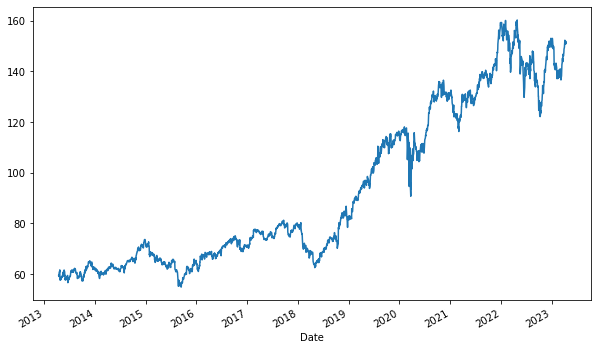

In [6]:
data.plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

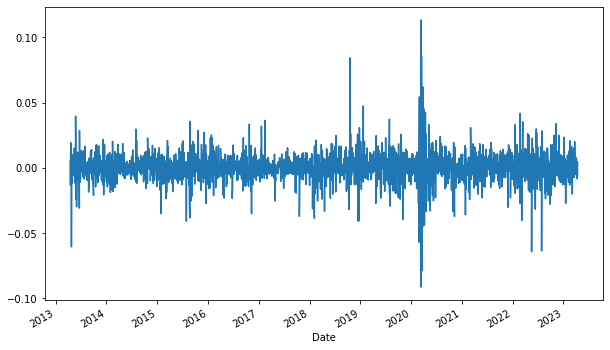

In [7]:
log_returns.plot(figsize=(10,6))

In [8]:
u= log_returns.mean()
u

0.0003697486278871749

In [9]:
var= log_returns.var()
var

0.0001336885640142219

drift = u- 1/2(var)

In [12]:
drift=u-(0.5*var)
drift

0.00030290434588006396

In [13]:
stdev= log_returns.std()
stdev

0.011562377091853643

In [15]:
type(drift)

float

In [25]:
drift = np.array(drift)

In [19]:
type(drift)

numpy.ndarray

In [23]:
stdev = np.array(stdev)

In [24]:
type(stdev)

numpy.ndarray

In [34]:
norm.ppf(0.95)

1.6448536269514722

In [29]:
x=np.random.rand(10,2)
x

array([[0.17427837, 0.60375731],
       [0.70914327, 0.45374835],
       [0.33359951, 0.21933254],
       [0.73903347, 0.5273834 ],
       [0.36586204, 0.51848544],
       [0.76386667, 0.61470195],
       [0.97198807, 0.92565528],
       [0.15442244, 0.17594094],
       [0.03434157, 0.71892763],
       [0.82646841, 0.19925286]])

In [33]:
norm.ppf(x)

array([[-0.93739243,  0.26308459],
       [ 0.55088361, -0.11619664],
       [-0.42999535, -0.77444939],
       [ 0.6403685 ,  0.06869399],
       [-0.34283304,  0.04635272],
       [ 0.71879595,  0.29159526],
       [ 1.91084992,  1.44417611],
       [-1.0176488 , -0.93094524],
       [-1.82049837,  0.57965878],
       [ 0.94030103, -0.84429297]])

In [35]:
z=norm.ppf(np.random.rand(10,1))
z

array([[ 1.17275887],
       [-0.71773882],
       [-1.04128596],
       [-0.15373856],
       [ 1.061789  ],
       [ 0.37932087],
       [ 1.29504393],
       [-0.3599061 ],
       [-0.87524558],
       [ 0.0708015 ]])

In [36]:
t_intervals=1000
iterations = 10

daily returns= e^r

r= drift+stdev.z

In [37]:
daily_returns = np.exp(drift+stdev*norm.ppf(np.random.rand(t_intervals,iterations)))

In [38]:
daily_returns

array([[0.9845016 , 1.00249234, 1.01314189, ..., 0.97902856, 1.01280248,
        0.98411724],
       [0.99121106, 1.00492692, 0.98117034, ..., 1.03213792, 0.99427799,
        0.9998819 ],
       [0.98815044, 1.01481997, 0.99995035, ..., 0.98924351, 0.99959716,
        0.99560047],
       ...,
       [0.99015959, 0.98539618, 0.99775706, ..., 0.99757253, 0.99316794,
        0.99695312],
       [0.98244254, 0.99052941, 1.00943738, ..., 0.98771577, 0.99711728,
        0.99561494],
       [1.01602413, 0.98547121, 0.98525531, ..., 0.99786512, 0.99199294,
        0.98598634]])

price list


St=So.daily_return


St+1= So.daily_return(t+1)


st+1000= So.daily_returns(t+1000)

In [39]:
s0= data.iloc[-1]
s0

151.0

In [41]:
price_list= np.zeros_like(daily_returns)

In [42]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
price_list[0]=s0
price_list

array([[151., 151., 151., ..., 151., 151., 151.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [44]:
for t in range (1, t_intervals):
    price_list[t]=price_list[t-1]*daily_returns[t]
    

In [45]:
price_list

array([[151.        , 151.        , 151.        , ..., 151.        ,
        151.        , 151.        ],
       [149.67286937, 151.74396497, 148.15672208, ..., 155.85282626,
        150.13597582, 150.98216679],
       [147.89931142, 153.99280559, 148.14936659, ..., 154.17639716,
        150.07549536, 150.31791642],
       ...,
       [212.06725118, 167.63018007, 304.13202064, ..., 362.99723328,
        119.49614415, 120.30754219],
       [208.34388965, 166.04262374, 307.00223108, ..., 358.53809265,
        119.15167069, 119.77998596],
       [211.68242004, 163.6302258 , 302.47557884, ..., 357.77265668,
        118.19761647, 118.10142949]])

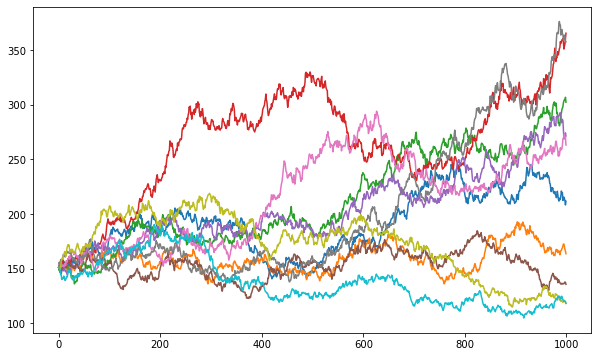

In [46]:
plt.figure(figsize=(10,6))
plt.plot(price_list)

In [47]:
#obtain 10 expected price paths and plotted them in matplot lib